# Demo of spectroscopy mode with slit and prism features

In [19]:
from corgisim import scene
from corgisim import instrument
import matplotlib.pyplot as plt
import numpy as np
import proper
import roman_preflight_proper

In [20]:
### Copy the default prescription file 
roman_preflight_proper.copy_here()

## 1. Configure scene

### As an example, we will configure a scene with one V=22 companion with a flat spectrum around a V=6 star. 

In [21]:
# --- Host Star Properties ---
Vmag = 6                            # V-band magnitude of the host star
sptype = 'G0V'                      # Spectral type of the host star
ref_flag = False                    # if the target is a reference star or not, default is False
host_star_properties = {'Vmag': Vmag,
                        'spectral_type': sptype,
                        'magtype': 'vegamag',
                        'ref_flag': False}

# --- Companion Properties ---
mag_companion = [22]           # List of magnitudes for each companion

# Define their positions relative to the host star, in milliarcseconds (mas)
# For reference: 1 λ/D at 550 nm with a 2.3 m telescope is ~49.3 mas
mas_per_lamD = 63.72 # Band 3
dx = [2 * mas_per_lamD]         # X positions in mas for each companion
dy = [6 * mas_per_lamD]         # Y positions in mas for each companion

# Construct a list of dictionaries for all companion point sources
point_source_info = [
    {
        'Vmag': mag_companion[0],
        'magtype': 'vegamag',
        'position_x': dx[0],
        'position_y': dy[0]
    }
]

# --- Create the Astrophysical Scene ---
# This Scene object combines the host star and companion(s)
base_scene = scene.Scene(host_star_properties, point_source_info)
base_scene_copy = scene.Scene(host_star_properties, point_source_info)

# --- Access the generated stellar spectrum ---
sp_star = base_scene.stellar_spectrum
# --- Access the generated companion spectrum ---
sp_comp = base_scene.off_axis_source_spectrum 

Adding 1 off-axis sources
Adding 1 off-axis sources


### Set the coronagraph mode to SPC and use the speckle models with 2E-8 raw contrast.

In [22]:
cgi_mode = 'spec'
cor_type = 'spc-spec_band3'
bandpass = '3F'
cases = ['2e-8']      
# cases = ['1e-9']      
rootname = 'spc-spec_ni_' + cases[0]
dm1 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm1_v.fits' )
dm2 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm2_v.fits' )
roll_angle = 0 # In the current implementation of skycoord_to_excamcoord() this corresponds to North up and East left on the EXCAM data array.

## 2. Unocculted star images  
- Sub-band filters, with prism, no slit  
- Broadband, with prism, with and without slit

### Sub-band prism images, repeated with CFAM filters 3A, 3B, 3C, 3D, 3E, and 3F

In [23]:
##  Define the polaxis parameter. Use 10 for non-polaxis cases only, as other options are not yet implemented.
polaxis = 10
# output_dim define the size of the output image
output_dim = 121
overfac = 5

source_y_offset = 6.0 #lam/D

#set use_fpm keyword to 0 to generate unocculted star image with no FPM
#set prism keyword to PRISM3 to use band 3 spec prism
#supported prism parameters are PRISM2 for band 2 and PRISM3 for band 3
offset_star_optics_keywords ={'cor_type':cor_type, 'use_errors':0, 'polaxis':polaxis, 'output_dim':output_dim, 
        'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2, 'use_fpm':0, 'use_lyot_stop':1, 'fsm_y_offset':source_y_offset,
        'prism':'PRISM3', 'wav_step_um':2E-3}

#set bandpass from 3A to 3F to generate image with each CFAM filter
optics_noslit_prism_cfam3A = instrument.CorgiOptics(cgi_mode, bandpass='3A', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_noslit_prism_cfam3B = instrument.CorgiOptics(cgi_mode, bandpass='3B', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_noslit_prism_cfam3C = instrument.CorgiOptics(cgi_mode, bandpass='3C', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_noslit_prism_cfam3D = instrument.CorgiOptics(cgi_mode, bandpass='3D', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_noslit_prism_cfam3E = instrument.CorgiOptics(cgi_mode, bandpass='3E', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_noslit_prism_cfam3F = instrument.CorgiOptics(cgi_mode, bandpass='3F', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)

CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.


/Users/nzimmerm/Roman_sims_and_analysis/corgisim/corgisim/instrument.py:213: UserWarning: No slit selected in spec mode, the slit mask will not be applied to the image cube.
  warnings.warn("No slit selected in spec mode, the slit mask will not be applied to the image cube.")


### Compute the PSF for the occulted star

In [24]:
sim_unocc_noslit_prism_cfam3A = optics_noslit_prism_cfam3A.get_host_star_psf(base_scene)
sim_unocc_noslit_prism_cfam3B = optics_noslit_prism_cfam3B.get_host_star_psf(base_scene)
sim_unocc_noslit_prism_cfam3C = optics_noslit_prism_cfam3C.get_host_star_psf(base_scene)
sim_unocc_noslit_prism_cfam3D = optics_noslit_prism_cfam3D.get_host_star_psf(base_scene)
sim_unocc_noslit_prism_cfam3E = optics_noslit_prism_cfam3E.get_host_star_psf(base_scene)
sim_unocc_noslit_prism_cfam3F = optics_noslit_prism_cfam3F.get_host_star_psf(base_scene)

source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 59.890, 81.145
full frame source location (x, y) with prism = 1599.890, 546.145
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 59.945, 70.537
full frame source location (x, y) with prism = 1599.945, 535.537
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 59.994, 61.145
full frame source location (x, y) with prism = 1599.994, 526.145
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.044, 51.460
full frame source location (x, y) with prism = 1600.044, 516.460
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.083, 44.023
full frame source location (x, y) with prism = 1600.083, 509.023
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.000, 60.001
full frame source location (x, y) with prism 

### Store the image array for each filter case

In [25]:
image_unocc_noslit_prism_cfam3A = sim_unocc_noslit_prism_cfam3A.host_star_image.data
image_unocc_noslit_prism_cfam3B = sim_unocc_noslit_prism_cfam3B.host_star_image.data
image_unocc_noslit_prism_cfam3C = sim_unocc_noslit_prism_cfam3C.host_star_image.data
image_unocc_noslit_prism_cfam3D = sim_unocc_noslit_prism_cfam3D.host_star_image.data
image_unocc_noslit_prism_cfam3E = sim_unocc_noslit_prism_cfam3E.host_star_image.data
image_unocc_noslit_prism_cfam3F = sim_unocc_noslit_prism_cfam3F.host_star_image.data

### Plot the sub-band filter prism images

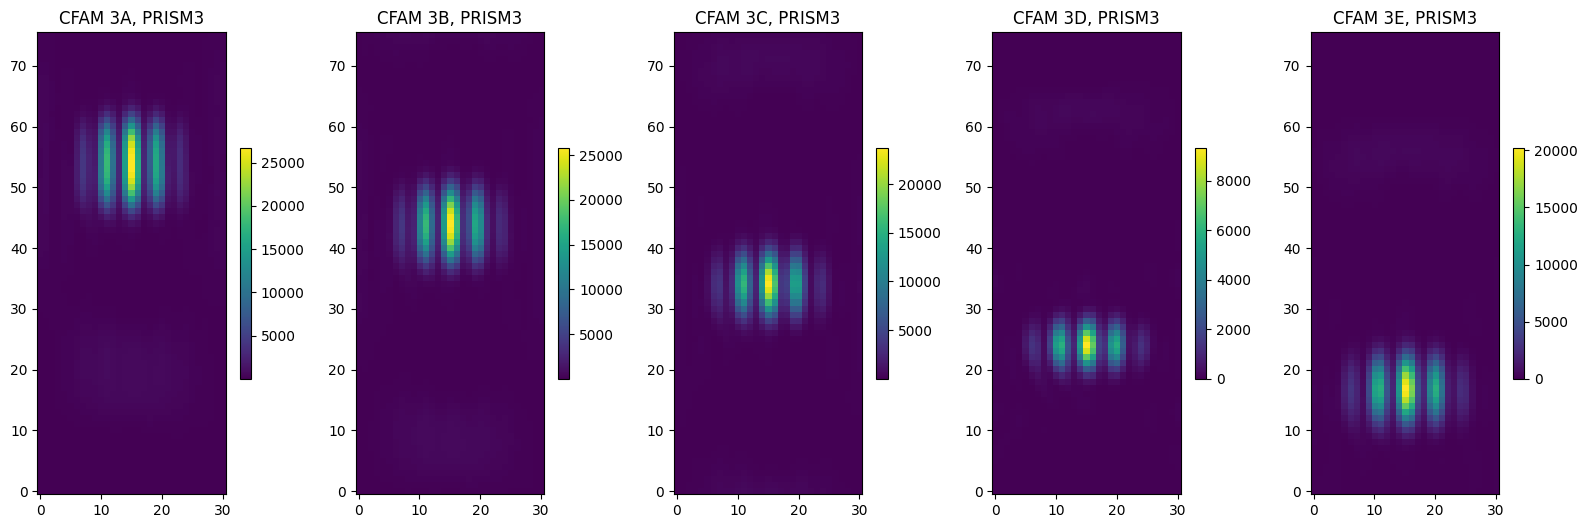

In [26]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.15)

xcrop = 45

plt.subplot(151)
plt.imshow(image_unocc_noslit_prism_cfam3A[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('CFAM 3A, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(152)
plt.imshow(image_unocc_noslit_prism_cfam3B[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('CFAM 3B, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(153)
plt.imshow(image_unocc_noslit_prism_cfam3C[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('CFAM 3C, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(154)
plt.imshow(image_unocc_noslit_prism_cfam3D[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('CFAM 3D, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(155)
plt.imshow(image_unocc_noslit_prism_cfam3E[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('CFAM 3E, PRISM3')
plt.colorbar(shrink=0.5)

### Broadband and narrowband prism images with slit 

#### Set the optics configuration with the FSAM slit mask. Here we specify the R1C2 slit offset by 6.0 lambda/D.

In [27]:
##  Define the polaxis parameter. Use 10 for non-polaxis cases only, as other options are not yet implemented.
polaxis = 10
# output_dim define the size of the output image
output_dim = 121
overfac = 5

source_y_offset = 6.0 #lam/D
source_y_offset_mas = source_y_offset * mas_per_lamD

#set slit keyword to R1C2
#supported slits in band 2 are R6C5 and R3C1
#supported slits in band 3 are R1C2 and R3C1
offset_star_optics_keywords ={'cor_type':cor_type, 'use_errors':0, 'polaxis':polaxis, 'output_dim':output_dim, 
        'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2, 'use_fpm':0, 'use_lyot_stop':1, 'fsm_y_offset':source_y_offset,
        'prism':'PRISM3', 'wav_step_um':2E-3, 'slit':'R1C2', 'slit_y_offset_mas':source_y_offset_mas} 

optics_slit_prism_cfam3F = instrument.CorgiOptics(cgi_mode, bandpass='3F', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)
optics_slit_prism_cfam3D = instrument.CorgiOptics(cgi_mode, bandpass='3D', optics_keywords=offset_star_optics_keywords, if_quiet=True,
                                oversample = overfac, return_oversample = False)

CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.


### Get the occulted star PSF with the slit in place for each filter case 3F and 3D

In [28]:
sim_unocc_slit_prism_cfam3F = optics_slit_prism_cfam3F.get_host_star_psf(base_scene)
sim_unocc_slit_prism_cfam3D = optics_slit_prism_cfam3D.get_host_star_psf(base_scene)

source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.000, 60.001
full frame source location (x, y) with prism = 1600.000, 525.001
source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.044, 51.460
full frame source location (x, y) with prism = 1600.044, 516.460


In [29]:
image_unocc_slit_prism_cfam3F = sim_unocc_slit_prism_cfam3F.host_star_image.data
image_unocc_slit_prism_cfam3D = sim_unocc_slit_prism_cfam3D.host_star_image.data

In [30]:
print(np.sum(image_unocc_slit_prism_cfam3F) / np.sum(image_unocc_noslit_prism_cfam3F))
print(np.sum(image_unocc_slit_prism_cfam3D) / np.sum(image_unocc_noslit_prism_cfam3D))

0.5306826269824724
0.5039142098610225


### Plot the results to compare prism images with and without the slit in place.

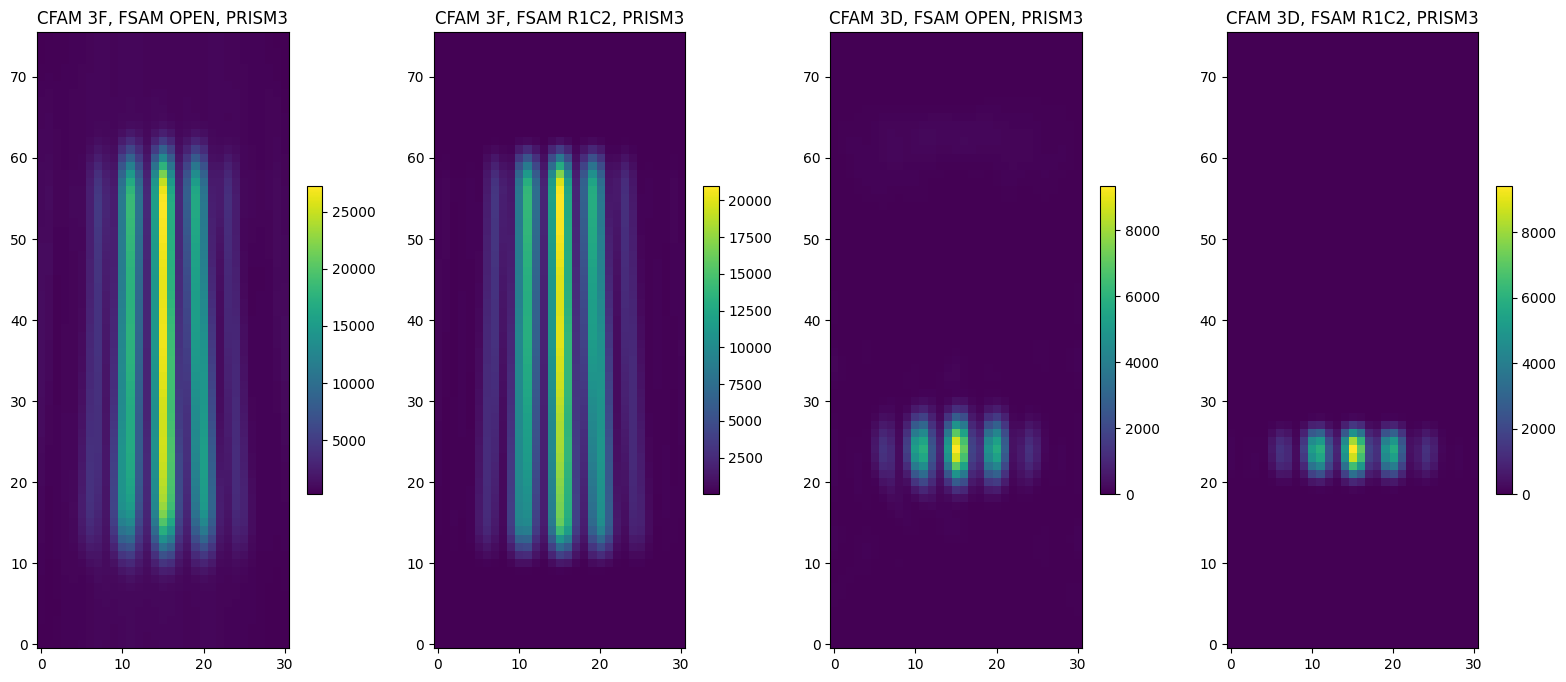

In [31]:
fig = plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.10)
xcrop = 45

plt.subplot(141)
plt.imshow(image_unocc_noslit_prism_cfam3F[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'CFAM 3F, FSAM OPEN, PRISM3')
plt.colorbar(shrink=0.5)
plt.subplot(142)
plt.imshow(image_unocc_slit_prism_cfam3F[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'CFAM 3F, FSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(143)
plt.imshow(image_unocc_noslit_prism_cfam3D[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'CFAM 3D, FSAM OPEN, PRISM3')
plt.colorbar(shrink=0.5)
plt.subplot(144)
plt.imshow(image_unocc_slit_prism_cfam3D[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'CFAM 3D, FSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

### Set the optics configuration for the target scene, repeated with and without the slit in place.

In [ ]:
##  Define the polaxis parameter. Use 10 for non-polaxis cases only, as other options are not yet implemented.
polaxis = 10
# output_dim define the size of the output image
output_dim = 121
overfac = 5

#set slit and prism keywords to none
optics_keywords_noslit_noprism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,
                  'slit':'None', 'prism':'None'}

optics_keywords_slit_noprism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,
                  'slit':'R1C2', 'slit_y_offset_mas':base_scene.point_source_ddec[0], 'prism':'None'}

optics_keywords_slit_prism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,
                  'slit':'R1C2', 'slit_y_offset_mas':base_scene.point_source_ddec[0], 'prism':'PRISM3', 'wav_step_um':2E-3}

optics_noslit_noprism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_noslit_noprism, if_quiet=True,
                                small_spc_grid = 0, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

optics_slit_noprism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_slit_noprism, if_quiet=True,
                                small_spc_grid = 1, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

optics_slit_prism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_slit_prism, if_quiet=True,
                                small_spc_grid = 1, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.


/Users/nzimmerm/Roman_sims_and_analysis/corgisim/corgisim/instrument.py:198: UserWarning: No prism selected in spec mode, the dispersion model will not be applied to the image cube.
  warnings.warn("No prism selected in spec mode, the dispersion model will not be applied to the image cube.")


## 3. On-axis star with companion source



### Images without companion

In [33]:
sim_scene_noslit_noprism = optics_noslit_noprism.get_host_star_psf(base_scene)

In [34]:
sim_scene_slit_noprism = optics_slit_noprism.get_host_star_psf(base_scene)

In [35]:
sim_scene_slit_prism = optics_slit_prism.get_host_star_psf(base_scene)

source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.000, 60.001
full frame source location (x, y) with prism = 1600.000, 525.001


In [50]:
image_star_noslit_noprism = sim_scene_noslit_noprism.host_star_image.data
image_star_slit_noprism = sim_scene_slit_noprism.host_star_image.data
image_star_slit_prism = sim_scene_slit_prism.host_star_image.data

### Images with companion

In [37]:
optics_slit_prism.inject_point_sources(base_scene, sim_scene_slit_prism)

In [38]:
optics_noslit_noprism.inject_point_sources(base_scene, sim_scene_noslit_noprism)

In [39]:
image_comp_noslit_noprism = sim_scene_noslit_noprism.point_source_image.data
combined_image_noslit_noprism = image_star_noslit_noprism + image_comp_noslit_noprism

image_comp_slit_prism = sim_scene_slit_prism.point_source_image.data
combined_image_slit_prism = image_star_slit_prism + image_comp_slit_prism

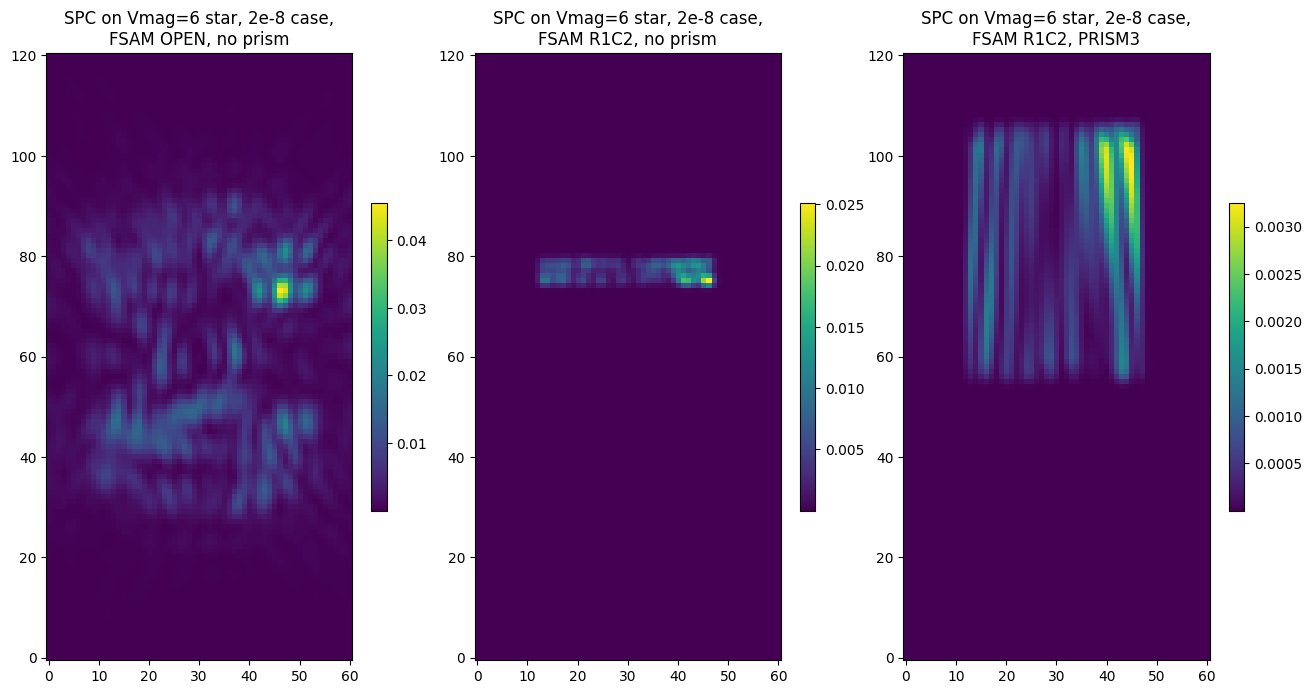

In [40]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.12)
xcrop = 30

plt.subplot(131)
plt.imshow(image_star_noslit_noprism[:,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} case,\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_star_slit_noprism[:,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} case,\nFSAM R1C2, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(image_star_slit_prism[:,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} case,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

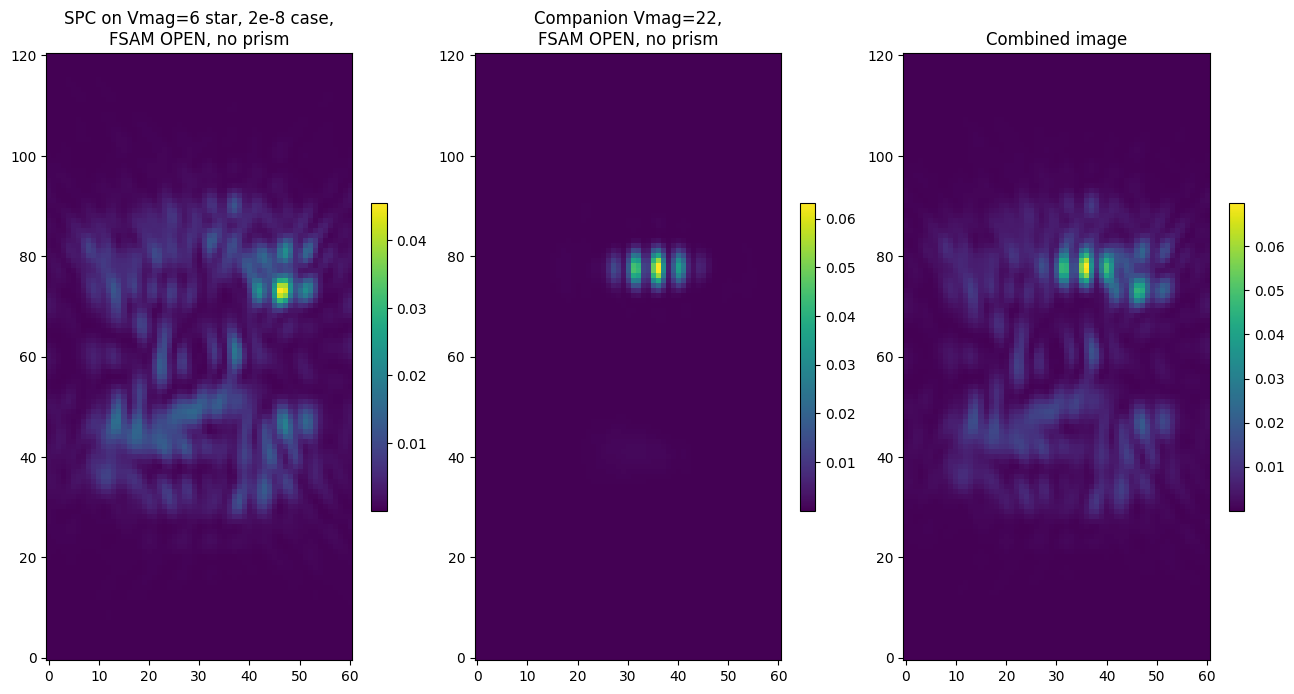

In [41]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.12)
xcrop = 30

plt.subplot(131)
plt.imshow(image_star_noslit_noprism[:,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} case,\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_comp_noslit_noprism[:,xcrop:-xcrop], origin='lower')
plt.title(f'Companion Vmag={mag_companion[0]},\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(combined_image_noslit_noprism[:,xcrop:-xcrop], origin='lower')
plt.title('Combined image')
plt.colorbar(shrink=0.5)

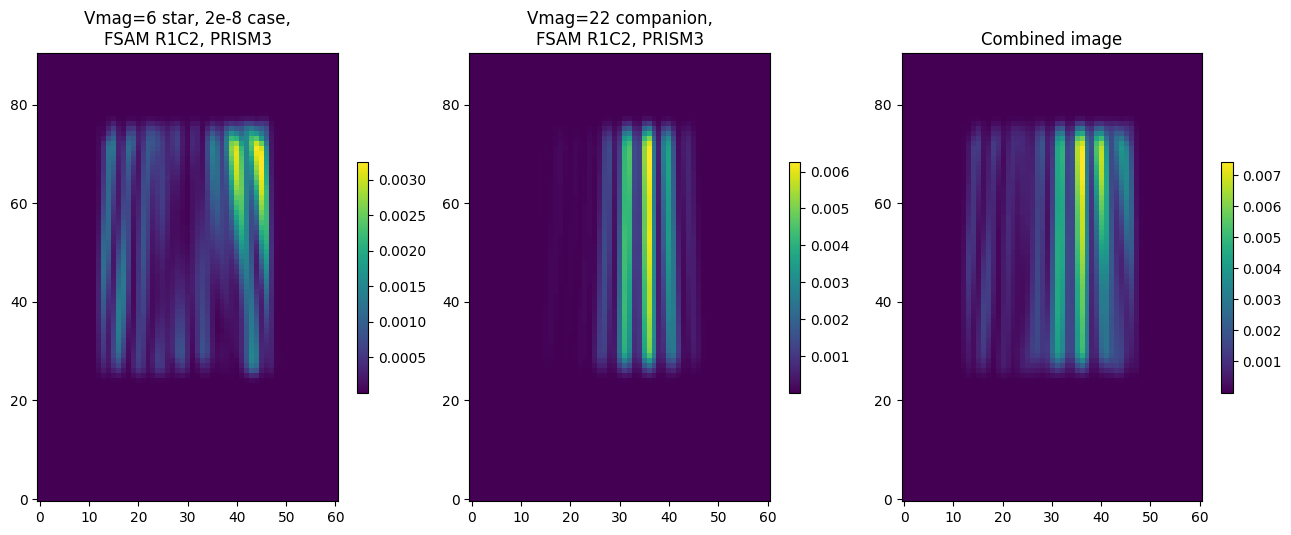

In [42]:
fig = plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.15)
xcrop = 30

plt.subplot(131)
plt.imshow(image_star_slit_prism[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'Vmag={Vmag} star, {cases[0]} case,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_comp_slit_prism[xcrop:,xcrop:-xcrop],origin='lower')
plt.title(f'Vmag={mag_companion[0]} companion,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(combined_image_slit_prism[xcrop:,xcrop:-xcrop],origin='lower')
plt.title('Combined image')
plt.colorbar(shrink=0.5)

## 4. Detector Image

### Add detector noise

In [43]:
#simulate detector noise
gain =100
emccd_keywords ={'em_gain':gain, 'cr_rate':0}
detector = instrument.CorgiDetector(emccd_keywords)
exptime = 10000
#use configuration with slit and prism as example
sim_scene_slit_prism = detector.generate_detector_image(sim_scene_slit_prism,exptime)
image_tot_sub= sim_scene_slit_prism.image_on_detector.data

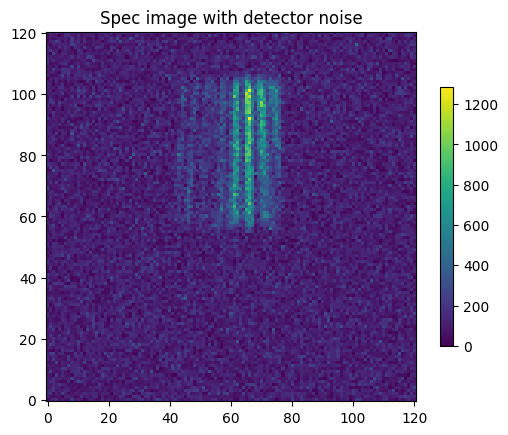

In [44]:
#plot image with detector noise
plt.imshow(image_tot_sub,origin='lower')
plt.title('Spec image with detector noise')

co = plt.colorbar(shrink=0.7)

### Full frame L1 image

In [45]:
#simulate full frame detector image
sim_scene_slit_prism = detector.generate_detector_image(sim_scene_slit_prism,exptime,full_frame=True,loc_x=512, loc_y=512)
image_tot_full = sim_scene_slit_prism.image_on_detector[1].data

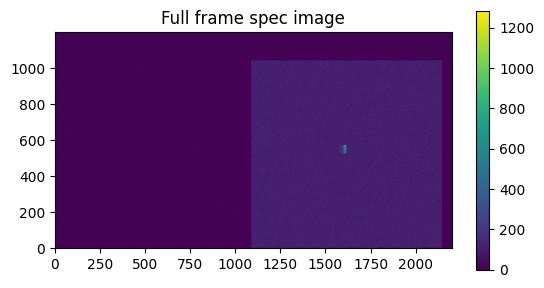

In [46]:
#plot full frame detector image
plt.imshow(image_tot_full,origin='lower')
plt.title('Full frame spec image')

co = plt.colorbar(shrink=0.7)

## 5. Rotated SPC and slit

#### Configure scene

In [74]:
# --- Host Star Properties ---
Vmag = 6                            # V-band magnitude of the host star
sptype = 'G0V'                      # Spectral type of the host star
ref_flag = False                    # if the target is a reference star or not, default is False
host_star_properties = {'Vmag': Vmag,
                        'spectral_type': sptype,
                        'magtype': 'vegamag',
                        'ref_flag': False}

# --- Companion Properties ---
mag_companion = [22]           # List of magnitudes for each companion

# Define their positions relative to the host star, in milliarcseconds (mas)
# For reference: 1 λ/D at 550 nm with a 2.3 m telescope is ~49.3 mas
mas_per_lamD = 63.72 # Band 3
dx = [-6 * mas_per_lamD]         # X positions in mas for each companion
dy = [3 * mas_per_lamD]         # Y positions in mas for each companion

# Construct a list of dictionaries for all companion point sources
point_source_info = [
    {
        'Vmag': mag_companion[0],
        'magtype': 'vegamag',
        'position_x': dx[0],
        'position_y': dy[0]
    }
]

# --- Create the Astrophysical Scene ---
# This Scene object combines the host star and companion(s)
base_scene = scene.Scene(host_star_properties, point_source_info)
base_scene_copy = scene.Scene(host_star_properties, point_source_info)

# --- Access the generated stellar spectrum ---
sp_star = base_scene.stellar_spectrum
# --- Access the generated companion spectrum ---
sp_comp = base_scene.off_axis_source_spectrum 

Adding 1 off-axis sources
Adding 1 off-axis sources


#### Configure instrument optics

In [ ]:
cgi_mode = 'spec'
cor_type = 'spc-spec_band3_rotated'
##  Define the polaxis parameter. Use 10 for non-polaxis cases only, as other options are not yet implemented.
polaxis = 10
# output_dim define the size of the output image
output_dim = 121
overfac = 5

#set slit and prism keywords to none
optics_keywords_noslit_noprism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,
                  'slit':'None', 'prism':'None'}

optics_keywords_slit_noprism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1, 
                  'slit':'R1C2', 'prism':'None',
                  'slit_x_offset_mas':base_scene.point_source_dra[0], 'slit_y_offset_mas':base_scene.point_source_ddec[0]}

optics_keywords_slit_prism ={'cor_type':cor_type, 'use_errors':1, 'polaxis':polaxis, 'output_dim':output_dim, 
                  'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1, 
                  'slit':'R1C2', 'prism':'PRISM3', 'wav_step_um':2E-3,
                  'slit_x_offset_mas':base_scene.point_source_dra[0], 'slit_y_offset_mas':base_scene.point_source_ddec[0]}

optics_noslit_noprism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_noslit_noprism, if_quiet=True,
                                small_spc_grid = 0, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

optics_slit_noprism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_slit_noprism, if_quiet=True,
                                small_spc_grid = 1, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

optics_slit_prism = instrument.CorgiOptics(cgi_mode, bandpass, optics_keywords=optics_keywords_slit_prism, if_quiet=True,
                                small_spc_grid = 1, oversample = overfac, return_oversample = False, roll_angle=roll_angle)

CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.
CorgiOptics initialized with proper keywords.


/Users/nzimmerm/Roman_sims_and_analysis/corgisim/corgisim/instrument.py:99: UserWarning: Warning: Requested coronagraph is currently untested and might not work as expected
  warnings.warn('Warning: Requested coronagraph is currently untested and might not work as expected')
/Users/nzimmerm/Roman_sims_and_analysis/corgisim/corgisim/instrument.py:198: UserWarning: No prism selected in spec mode, the dispersion model will not be applied to the image cube.
  warnings.warn("No prism selected in spec mode, the dispersion model will not be applied to the image cube.")
/Users/nzimmerm/Roman_sims_and_analysis/corgisim/corgisim/instrument.py:213: UserWarning: No slit selected in spec mode, the slit mask will not be applied to the image cube.
  warnings.warn("No slit selected in spec mode, the slit mask will not be applied to the image cube.")


#### Compute images without companion

In [51]:
sim_scene_noslit_noprism = optics_noslit_noprism.get_host_star_psf(base_scene)

In [52]:
sim_scene_slit_noprism = optics_slit_noprism.get_host_star_psf(base_scene)

In [53]:
sim_scene_slit_prism = optics_slit_prism.get_host_star_psf(base_scene)

source location (x, y) without prism = 60.000, 60.000
source location (x, y) with prism = 60.000, 60.001
full frame source location (x, y) with prism = 1600.000, 525.001


In [54]:
image_star_noslit_noprism = sim_scene_noslit_noprism.host_star_image.data
image_star_slit_noprism = sim_scene_slit_noprism.host_star_image.data
image_star_slit_prism = sim_scene_slit_prism.host_star_image.data

### Compute images with companion

In [55]:
optics_slit_prism.inject_point_sources(base_scene, sim_scene_slit_prism)

In [56]:
optics_noslit_noprism.inject_point_sources(base_scene, sim_scene_noslit_noprism)

In [57]:
image_comp_noslit_noprism = sim_scene_noslit_noprism.point_source_image.data
combined_image_noslit_noprism = image_star_noslit_noprism + image_comp_noslit_noprism

image_comp_slit_prism = sim_scene_slit_prism.point_source_image.data
combined_image_slit_prism = image_star_slit_prism + image_comp_slit_prism

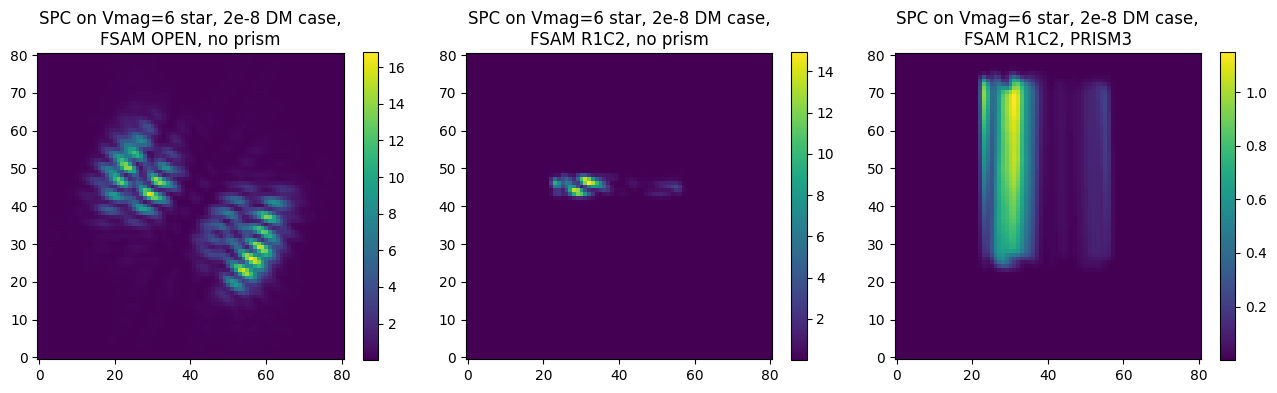

In [66]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.12)
xcrop = 20
ycrop = 20

plt.subplot(131)
plt.imshow(image_star_noslit_noprism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} DM case,\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_star_slit_noprism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} DM case,\nFSAM R1C2, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(image_star_slit_prism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} DM case,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

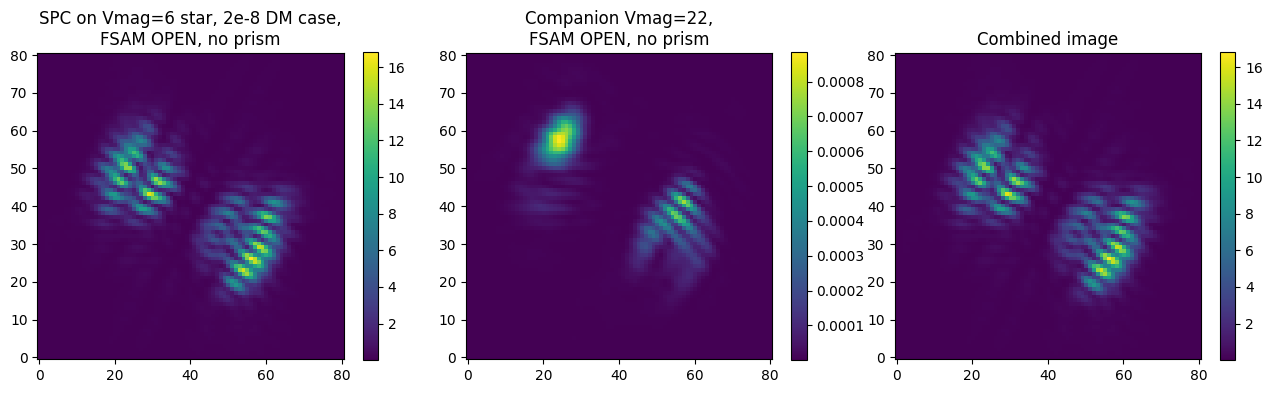

In [68]:
fig = plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.12)
xcrop = 20
ycrop = 20

plt.subplot(131)
plt.imshow(image_star_noslit_noprism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title(f'SPC on Vmag={Vmag} star, {cases[0]} DM case,\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_comp_noslit_noprism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title(f'Companion Vmag={mag_companion[0]},\nFSAM OPEN, no prism')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(combined_image_noslit_noprism[ycrop:-ycrop,xcrop:-xcrop], origin='lower')
plt.title('Combined image')
plt.colorbar(shrink=0.5)

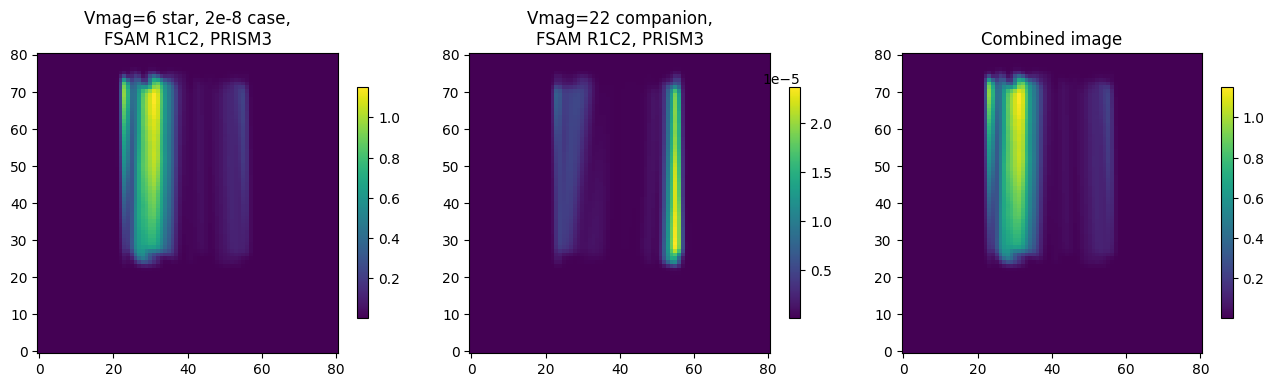

In [65]:
fig = plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.15)
xcrop = 20
ycrop = 20

plt.subplot(131)
plt.imshow(image_star_slit_prism[ycrop:-ycrop,xcrop:-xcrop],origin='lower')
plt.title(f'Vmag={Vmag} star, {cases[0]} case,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(132)
plt.imshow(image_comp_slit_prism[ycrop:-ycrop,xcrop:-xcrop],origin='lower')
plt.title(f'Vmag={mag_companion[0]} companion,\nFSAM R1C2, PRISM3')
plt.colorbar(shrink=0.5)

plt.subplot(133)
plt.imshow(combined_image_slit_prism[ycrop:-ycrop,xcrop:-xcrop],origin='lower')
plt.title('Combined image')
plt.colorbar(shrink=0.5)